# Quiz 4

BEFORE YOU START THIS QUIZ:

1. Click on "Copy to Drive" to make a copy of the quiz

2. Click on "Share",
    
3. Click on "Change" and select "Anyone with this link can edit"
    
4. Click "Copy link" and

5. Paste the link into [this Canvas assignment](https://canvas.olin.edu/courses/315/assignments/5071).

This quiz is based on Chapters 9 and 10 of [Think Complexity, 2nd edition](https://thinkcomplex.com).

Copyright 2021 Allen Downey, [MIT License](http://opensource.org/licenses/MIT)

In [602]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://github.com/AllenDowney/ThinkComplexity2/raw/master/notebooks/utils.py')


In [603]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

from utils import decorate

## Fireflies

In Chapter 1 of Think Complexity, I wrote about Strogatz's model of spontaneous synchronization in some species of fireflies and his proof that “sync was inevitable”. I said:

> Strogatz makes several simplifying assumptions, in particular that each firefly can see all the others. In my opinion, it is more interesting to explain how an entire valley of fireflies can synchronize despite the fact that they cannot all see each other.
>
>Explanations of these phenomena often use agent-based models, which explore ... the conditions that allow or prevent synchronization.

So let's get back to that.

Among many other awesome projects, [Nicky Case](https://ncase.me/faq/) has developed an online simulation of firefly synchronization, [which you can run here](https://ncase.me/fireflies/).

The goal of this activity is to replicate their model and explore its behavior as we vary some of its parameters.

Here are the steps:

1) Try out the simulation and read the text (in the left margin of the page) that explains the model.

2) Think about what aspects of the model you will replicate and what you will leave out.

3) Think about a parameter you might vary to see what effect it has.

4) Implement the model and see if it exhibits spontaneous synchronization.

5) Identify a parameter that can control whether synchronization occurs or not.

You should spend a minimum of 1.5 on this activity and a maximum of 3 hours. It might not be possible to complete all five steps in this time, but that's ok.
The goals of this activity are to practice the initial stages of a project and to develop rapid prototyping skills.

Some design decisions you should consider:

* What is the nature of the space the fireflies live in? It could be a grid, a network, or continuous space in 1, 2, or 3 dimensions.

* Do fireflies move in space, and how?

* Which fireflies can "see" each other, and how do they interact?

* How will you display the results, and how will you determine whether syncronization has occurred. (Animated displays are cool, but they might not be necessary and they can be a time sink.)

You are welcome to use external resources for this activity, but you should give credit to any resources you make substantial use of.

You can discuss your plans with the instructor and other students. You can get help debugging, if needed. But the result should be substantially your own, independent work.

Assuming that, as a class, we explore a variety of models and implementations, we should have some interesting results to compare!

## Allen's solution

I decided to put 100 fireflies in a WS graphs with k=10, so each firefly sees 10 neighbors.

With p=0, it's a ring lattice.

In [604]:
import networkx as nx

n = 100
k = 10
p = 0.0

G = nx.watts_strogatz_graph(n, k, p, seed=None)

For the step function, I made some initial guesses based on the description in the text, but I couldn't get the fireflies to synchronize.

I read [the source code](https://github.com/ncase/fireflies/blob/165d16c926a611db7e977e4d83a3f0428b3fbffd/js/index.js) starting on line 227 and tried to implement the same algorithm. 

In [606]:
nudge_size = 0.01

def step(clocks):
    clocks += 0.1
    flash = (clocks >= 1)
    clocks[flash] = 0
    
    indices, = np.nonzero(flash)    
    for index in indices:
        neighbors = list(G[index])
        clocks[neighbors] += nudge_size    
        clocks[clocks>1] = 1
        
    return flash.sum()

In [611]:
nudge_size = 0.05

def step(clocks):
    num_flash = 0
    
    for i in range(len(clocks)):
        clocks[i] += 0.1
        if clocks[i] > 1:
            num_flash += 1
            clocks[i] = 0
    
        for j in G[i]:
            clocks[j] += clocks[j] * nudge_size    
            if clocks[j] > 1:
                clocks[j] = 1
        
    return num_flash

In [616]:
np.random.seed(16)
clocks = np.random.uniform(0, 1, size=n)
clocks.mean()

0.49647524727207376

In [617]:
step(clocks)
clocks.mean()

0.462952357242777

In [618]:
ts = range(50)
flashes = [step(clocks) for t in ts]

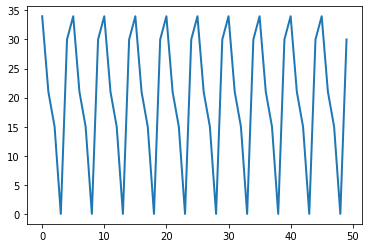

In [619]:
plt.plot(ts, flashes)